# Plot regression model schematic

In [75]:
import matplotlib.pyplot as plt 
import sciplotlib.style as splstyle
import matplotlib as mpl
import numpy as np 
import glob
import os

import scipy.stats as sstats
import scipy.signal as ssignal
import scipy.interpolate as spinterpolate

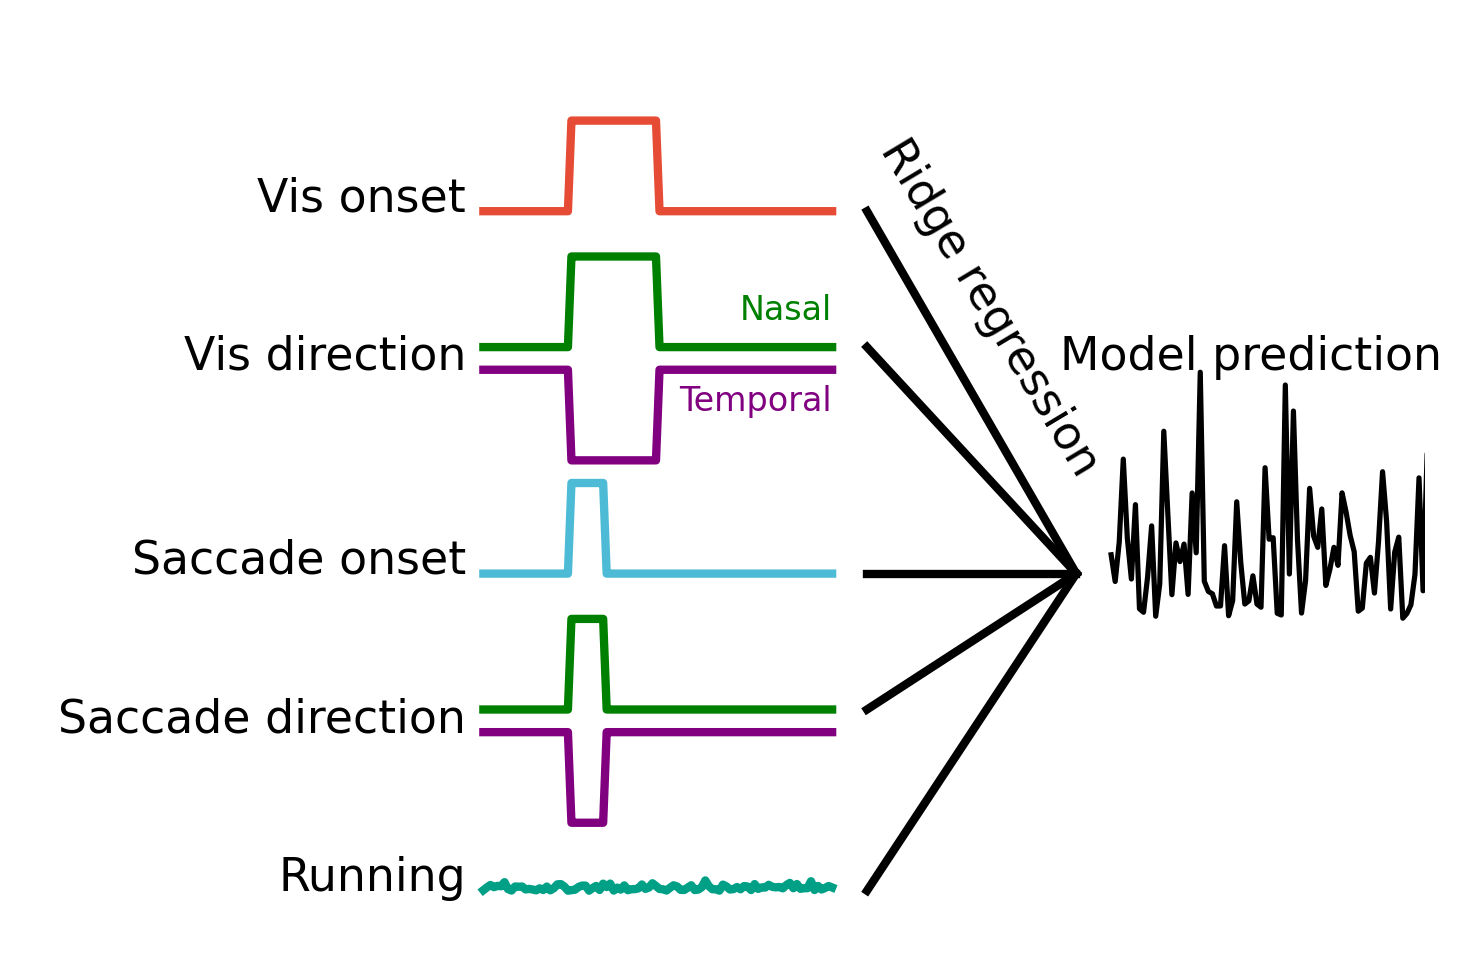

In [2]:
with plt.style.context(splstyle.get_style('nature-reviews')):

    fig, ax = plt.subplots()
    fig.set_size_inches(6, 4)
    
    text_size = 11
    vis_onset_trace_x = np.linspace(0, 1, 100)
    vis_onset_trace_y = np.zeros((100, ))
    vis_onset_trace_y[25:50] = 1
    
    saccade_onset_trace_x = np.linspace(0, 1, 100)
    saccade_onset_trace_y = np.zeros((100, ))
    saccade_onset_trace_y[25:35] = 1
    
    saccade_dir_trace_x = np.linspace(0, 1, 100)
    saccade_dir_trace_y = np.zeros((100, ))
    saccade_dir_trace_y[25:35] = 1
    
    running_trace_x = np.linspace(0, 1, 100)
    running_trace_y = np.abs(np.random.normal(0, 0.05, 100))
    
    vis_on_y_offset = 8
    vis_dir_y_offset = 6.5
    saccade_on_y_offset = 4
    saccade_dir_y_offset = 2.5
    running_y_offset = 0.5
    
    shared_x_offset = 0.8
    

    vis_dir_trace_y = np.zeros((100, ))
    vis_dir_trace_y[25:50] = 1
    


    ax.plot(vis_onset_trace_x + shared_x_offset, vis_onset_trace_y + vis_on_y_offset)
    ax.text(0.75, vis_on_y_offset, 'Vis onset', size=text_size, ha='right', color='black')

    ax.plot(vis_onset_trace_x + shared_x_offset, vis_dir_trace_y + vis_dir_y_offset, color='green')
    ax.plot(vis_onset_trace_x + shared_x_offset, -vis_dir_trace_y + vis_dir_y_offset - 0.25, color='purple')
    ax.text(shared_x_offset + 1, vis_dir_y_offset + 0.3, 'Nasal', color='green', size=8, ha='right')
    ax.text(shared_x_offset + 1, vis_dir_y_offset - 0.7, 'Temporal', color='purple', size=8, ha='right')
    
    ax.text(0.75, vis_dir_y_offset - 0.25, 'Vis direction', size=text_size, ha='right')
    
    ax.plot(saccade_onset_trace_x + shared_x_offset, saccade_onset_trace_y + saccade_on_y_offset)
    ax.text(0.75, saccade_on_y_offset, 'Saccade onset', size=text_size, ha='right', color='black')
    
    ax.plot(saccade_dir_trace_x + shared_x_offset, saccade_dir_trace_y + saccade_dir_y_offset, color='green')
    ax.text(0.75, saccade_dir_y_offset - 0.25, 'Saccade direction', size=text_size, ha='right', color='black')
    
    ax.plot(saccade_dir_trace_x + shared_x_offset, -saccade_dir_trace_y + saccade_dir_y_offset - 0.25, color='purple')
    
    ax.text(0.75, running_y_offset, 'Running', size=text_size, ha='right', color='black')
    
    ax.plot(running_trace_x + shared_x_offset, running_trace_y + running_y_offset)
    
    ax.set_ylim([0, 10])
    ax.set_xlim([-0.5, 3.5])
    
    
    # Line to link ride regression 
    line_start_x = 1.9
    line_end_x = 2.5
    line_end_y = 4
    
    all_line_start_y = [vis_on_y_offset, vis_dir_y_offset, 
                        saccade_on_y_offset,saccade_dir_y_offset,
                        running_y_offset]
    
    for line_start_y in all_line_start_y:
        
        ax.plot([line_start_x, line_end_x], 
                [line_start_y, line_end_y], color='black')
        
    
    
    model_output_trace_x = np.linspace(2.6, 3.75, 100)
    model_output_trace_y = np.abs(np.random.normal(0, 1, 100))
    
    ax.plot(model_output_trace_x, model_output_trace_y + line_end_y - 0.5, color='black', lw=1.25)
    ax.text(2.25, 5.1, 'Ridge regression', size=text_size, rotation=-59, ha='center')
    
    ax.text(3, 6.25, 'Model prediction', size=text_size, ha='center')
    
    
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

# Add a few more trials

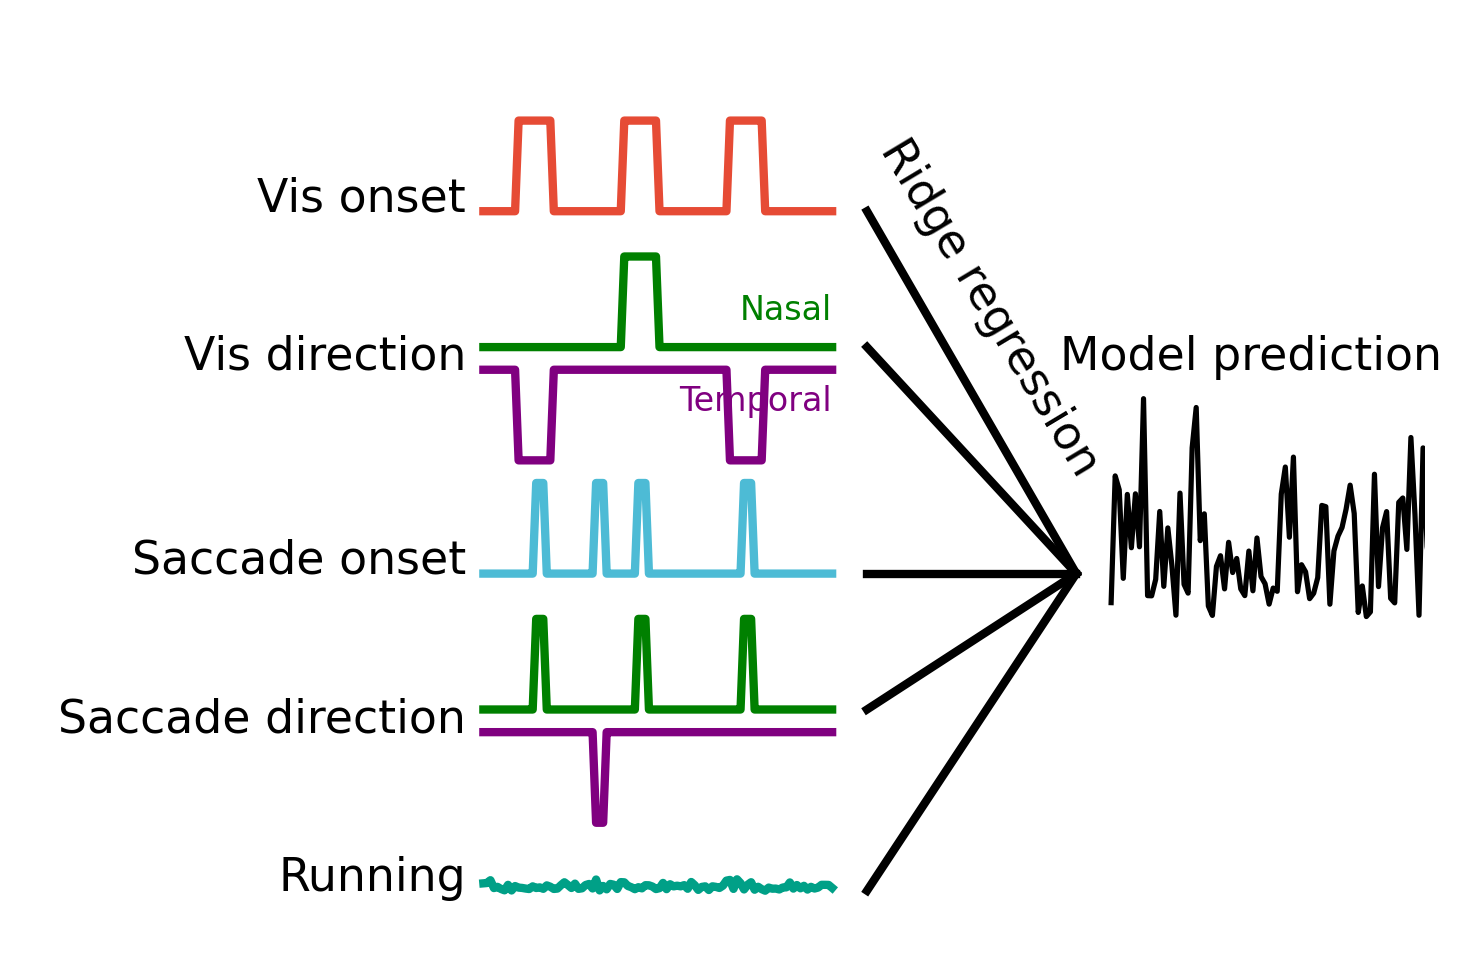

In [3]:
with plt.style.context(splstyle.get_style('nature-reviews')):

    fig, ax = plt.subplots()
    fig.set_size_inches(6, 4)
    
    vis_onset_frames = [10, 40, 70]
    vis_dirs = [-1, 1, -1]
    vis_dur = 10
    
    text_size = 11
    vis_onset_trace_x = np.linspace(0, 1, 100)
    vis_onset_trace_y = np.zeros((100, ))
    
    for vis_o_frame in vis_onset_frames:
        vis_onset_trace_y[vis_o_frame:vis_o_frame+vis_dur] = 1
        
    saccade_onset_frames = [15, 32, 44, 74]
    saccade_dur = 3
    saccade_dirs = [1, -1, 1, 1]
    
    saccade_onset_trace_x = np.linspace(0, 1, 100)
    saccade_onset_trace_y = np.zeros((100, ))
    
    saccade_nasal_trace = np.zeros((100, ))
    saccade_temporal_trace = np.zeros((100, ))
    
    for n, saccade_o_frame in enumerate(saccade_onset_frames):
        saccade_onset_trace_y[saccade_o_frame:saccade_o_frame+saccade_dur] = 1
        
        if saccade_dirs[n] == 1:
            saccade_nasal_trace[saccade_o_frame:saccade_o_frame+saccade_dur] = 1
        else:
            saccade_temporal_trace[saccade_o_frame:saccade_o_frame+saccade_dur] = 1
        
    
    saccade_dir_trace_x = np.linspace(0, 1, 100)
    saccade_dir_trace_y = np.zeros((100, ))
    saccade_dir_trace_y[40:50] = 1
    
    running_trace_x = np.linspace(0, 1, 100)
    running_trace_y = np.abs(np.random.normal(0, 0.05, 100))
    
    vis_on_y_offset = 8
    vis_dir_y_offset = 6.5
    saccade_on_y_offset = 4
    saccade_dir_y_offset = 2.5
    running_y_offset = 0.5
    
    shared_x_offset = 0.8


    ax.plot(vis_onset_trace_x + shared_x_offset, vis_onset_trace_y + vis_on_y_offset)
    ax.text(0.75, vis_on_y_offset, 'Vis onset', size=text_size, ha='right', color='black')
    
    vis_temporal_trace = np.zeros((100, ))
    vis_nasal_trace = np.zeros((100, ))
    
    for n, vis_dir in enumerate(vis_dirs):
        
        vis_dir_trace_y = np.zeros((100, ))
        vis_dir_trace_y[vis_onset_frames[n]:vis_onset_frames[n]+vis_dur] = 1
        
        if vis_dir == 1:
            vis_temporal_trace[vis_onset_frames[n]:vis_onset_frames[n]+vis_dur] = 1 
        else:
            vis_nasal_trace[vis_onset_frames[n]:vis_onset_frames[n]+vis_dur] = 1 
    
    ax.plot(vis_onset_trace_x + shared_x_offset, vis_temporal_trace + vis_dir_y_offset, color='green')
    ax.plot(vis_onset_trace_x + shared_x_offset, -vis_nasal_trace + vis_dir_y_offset - 0.25, color='purple')
    
    
    ax.text(shared_x_offset + 1, vis_dir_y_offset + 0.3, 'Nasal', color='green', size=8, ha='right')
    ax.text(shared_x_offset + 1, vis_dir_y_offset - 0.7, 'Temporal', color='purple', size=8, ha='right')
    
    ax.text(0.75, vis_dir_y_offset - 0.25, 'Vis direction', size=text_size, ha='right')
    
    ax.plot(saccade_onset_trace_x + shared_x_offset, saccade_onset_trace_y + saccade_on_y_offset)
    ax.text(0.75, saccade_on_y_offset, 'Saccade onset', size=text_size, ha='right', color='black')
    
    ax.plot(saccade_dir_trace_x + shared_x_offset, saccade_nasal_trace + saccade_dir_y_offset, color='green')
    ax.text(0.75, saccade_dir_y_offset - 0.25, 'Saccade direction', size=text_size, ha='right', color='black')
    
    ax.plot(saccade_dir_trace_x + shared_x_offset, -saccade_temporal_trace + saccade_dir_y_offset - 0.25, color='purple')
    
    ax.text(0.75, running_y_offset, 'Running', size=text_size, ha='right', color='black')
    
    ax.plot(running_trace_x + shared_x_offset, running_trace_y + running_y_offset)
    
    ax.set_ylim([0, 10])
    ax.set_xlim([-0.5, 3.5])
    
    
    # Line to link ride regression 
    line_start_x = 1.9
    line_end_x = 2.5
    line_end_y = 4
    
    all_line_start_y = [vis_on_y_offset, vis_dir_y_offset, 
                        saccade_on_y_offset,saccade_dir_y_offset,
                        running_y_offset]
    
    for line_start_y in all_line_start_y:
        
        ax.plot([line_start_x, line_end_x], 
                [line_start_y, line_end_y], color='black')
        
    
    
    model_output_trace_x = np.linspace(2.6, 3.75, 100)
    model_output_trace_y = np.abs(np.random.normal(0, 1, 100))
    
    ax.plot(model_output_trace_x, model_output_trace_y + line_end_y - 0.5, color='black', lw=1.25)
    ax.text(2.25, 5.1, 'Ridge regression', size=text_size, rotation=-59, ha='center')
    
    ax.text(3, 6.25, 'Model prediction', size=text_size, ha='center')
    
    
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

# Plot example neuron fit

In [23]:
regression_results_folder='/Volumes/Macintosh HD/Users/timothysit/SCmotVisCoding/Data/RegressionResults'
exp_type = 'both'
regression_result_files = glob.glob(os.path.join(regression_results_folder,
                                                             '*%s*npz' % exp_type))
fpath = regression_result_files[0]
regression_result = np.load(fpath, allow_pickle=True)

X_sets_names = regression_result['X_sets_names']
X_set_to_plot = 'vis_and_saccade_and_running'
X_set_idx = np.where(X_sets_names == X_set_to_plot)[0][0]
explained_var_per_X_set = regression_result['explained_var_per_X_set']

explained_var_X_set_to_plot = explained_var_per_X_set[:, X_set_idx]

Y_test = regression_result['Y_test']  # num cv x num time points x num neurons
Y_test_hat = regression_result['Y_test_hat'][X_set_idx] # num model x num cv x num time points x num neurons



In [35]:
explained_var_sort_idx = np.argsort(explained_var_X_set_to_plot)[::-1]

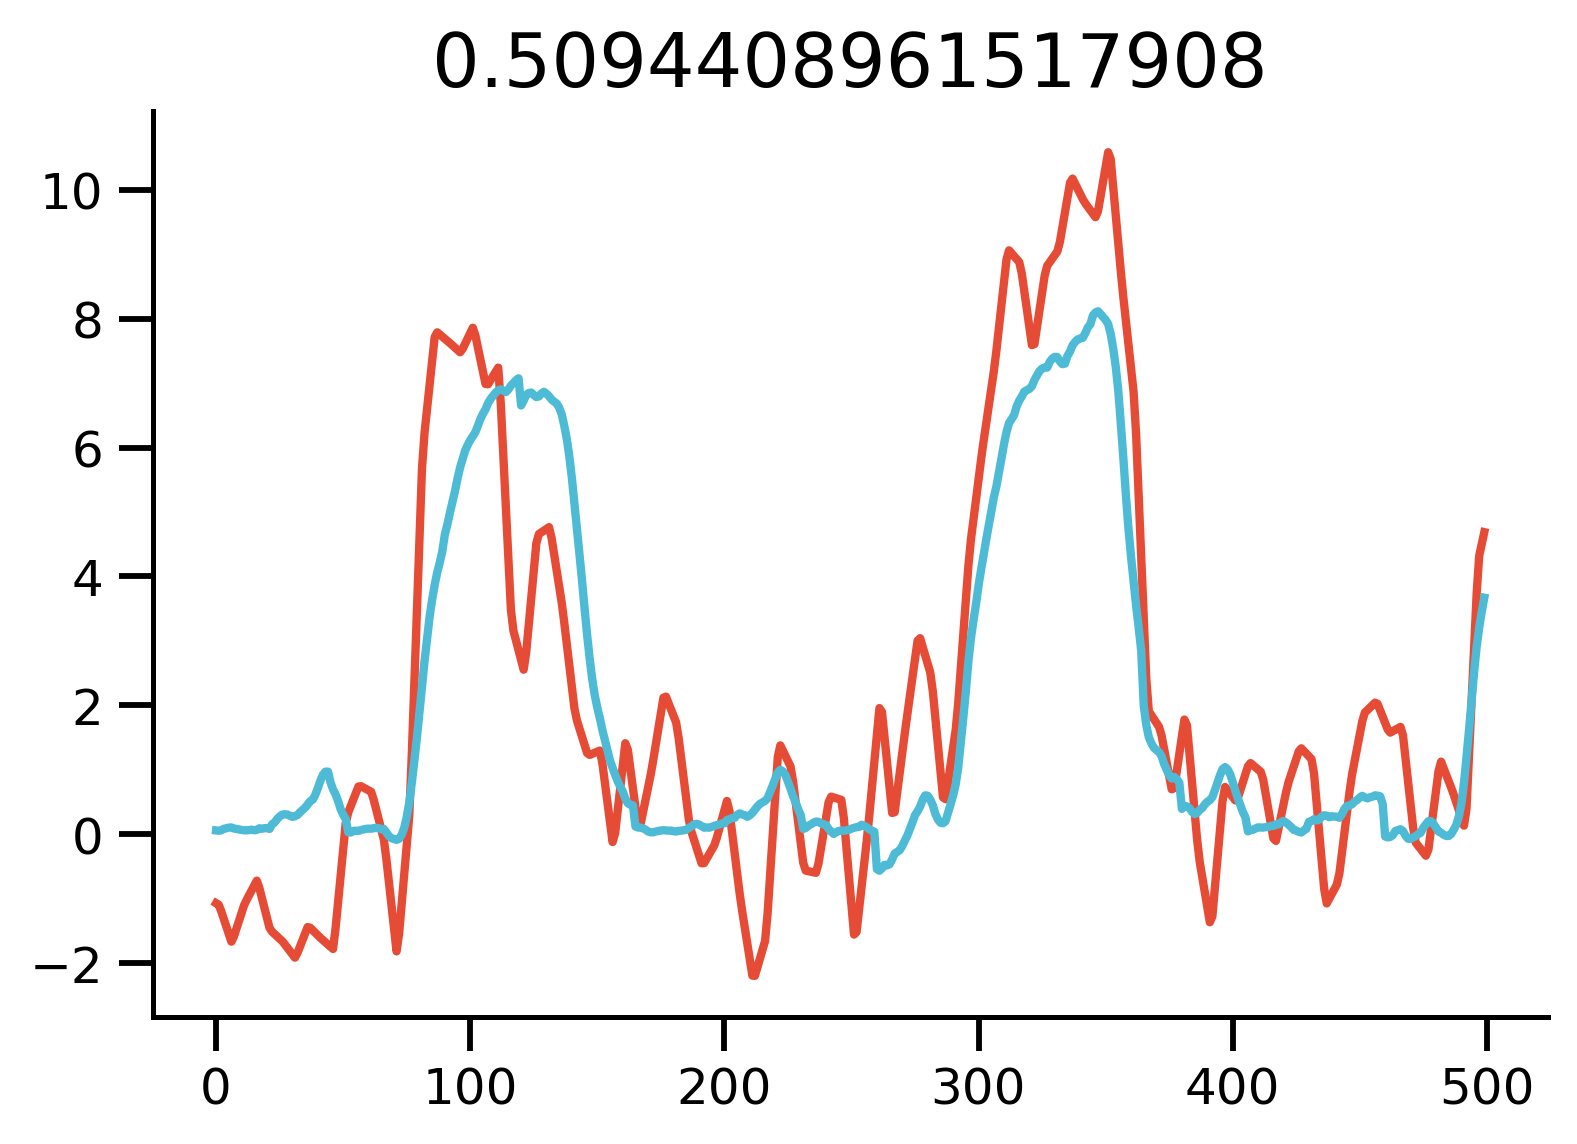

In [44]:
ex_idx = 0

subset_idx = np.arange(2000, 2500)

with plt.style.context(splstyle.get_style('nature-reviews')):
    fig, ax = plt.subplots()
    ax.set_title(explained_var_X_set_to_plot[explained_var_sort_idx[ex_idx]])
    ax.plot(Y_test[0][subset_idx, explained_var_sort_idx[ex_idx]])
    ax.plot(Y_test_hat[0][subset_idx, explained_var_sort_idx[ex_idx]])
    
    
    

In [39]:
np.shape(Y_test[0])

(5545, 546)

In [10]:
np.shape(regression_result['explained_var_per_X_set'])

(546, 7)

# Switch to saccade nasal and saccade temporal, likewise for visual

In [46]:
# load some real running data 
data_folder='/Volumes/Macintosh HD/Users/timothysit/SCmotVisCoding/Data/InteractionSacc_Vis/New07032023'
running_speed_files = glob.glob(os.path.join(data_folder, '*running*.npy'))
running_data = np.load(running_speed_files[0])[0]

running_data_zscored = sstats.zscore(running_data) 
running_data_zscored_scaled = running_data_zscored / np.max(running_data_zscored)
running_data_zscored_scaled_resampled = ssignal.resample(running_data_zscored_scaled, num=1000)

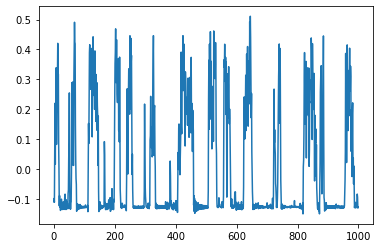

In [38]:
fig, ax = plt.subplots()
ax.plot(running_data_zscored_scaled_resampled)

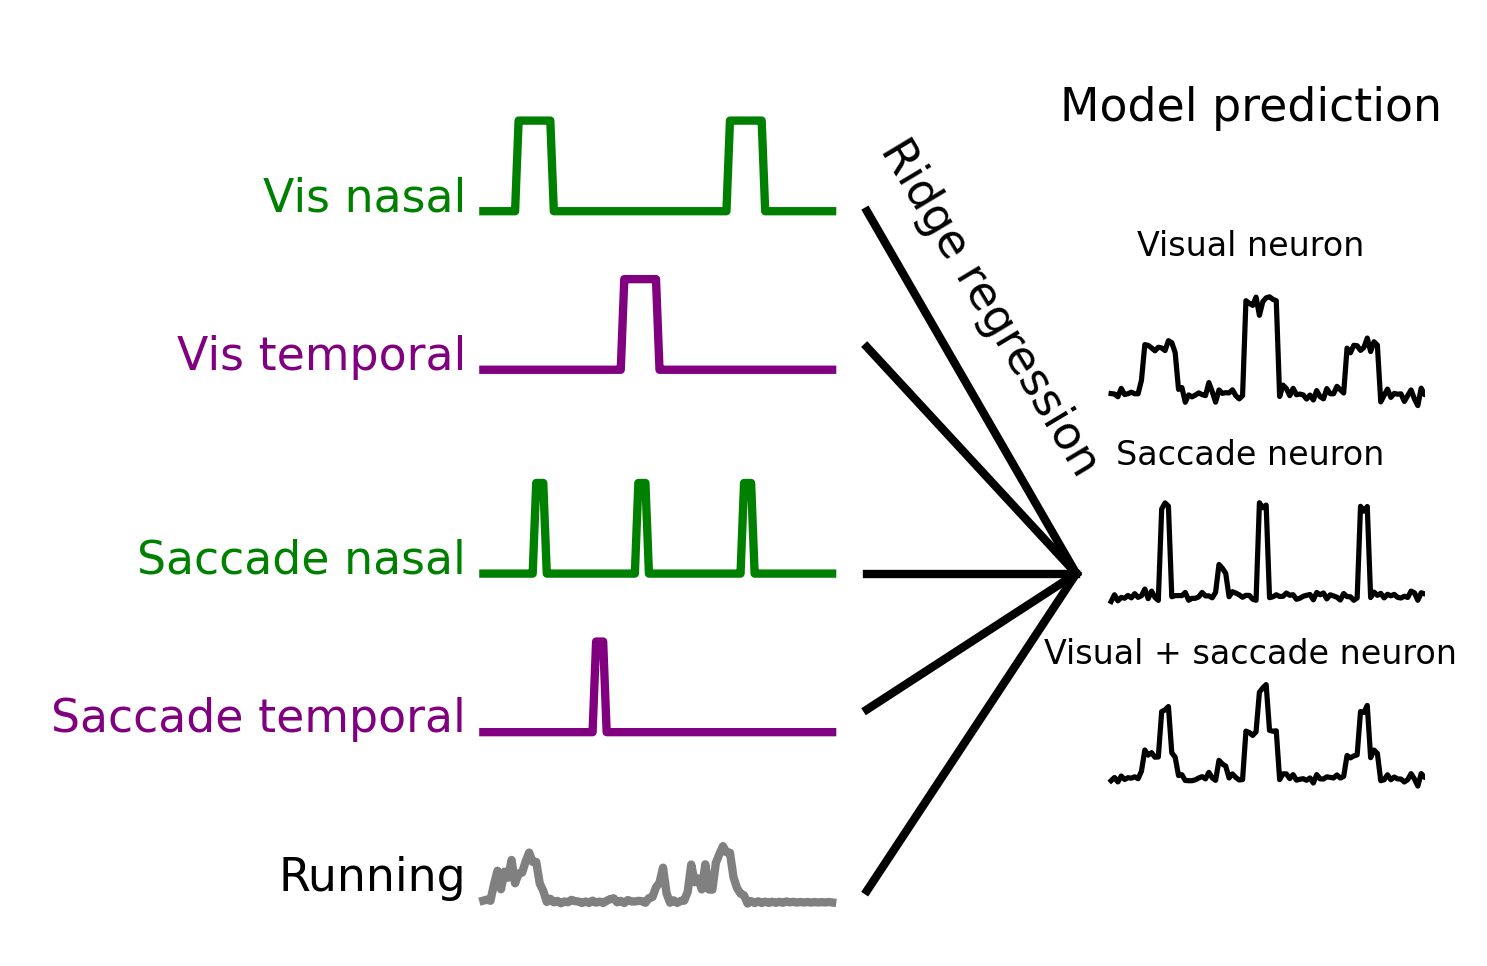

In [114]:
nasal_color = 'green'
temporal_color = 'purple'

with plt.style.context(splstyle.get_style('nature-reviews')):

    fig, ax = plt.subplots()
    fig.set_size_inches(6, 4)
    
    vis_onset_frames = [10, 40, 70]
    vis_dirs = [-1, 1, -1]
    vis_dur = 10
    
    text_size = 11
    vis_onset_trace_x = np.linspace(0, 1, 100)
    vis_onset_trace_y = np.zeros((100, ))
    
    for vis_o_frame in vis_onset_frames:
        vis_onset_trace_y[vis_o_frame:vis_o_frame+vis_dur] = 1
        
    saccade_onset_frames = [15, 32, 44, 74]
    saccade_dur = 3
    saccade_dirs = [1, -1, 1, 1]
    
    saccade_onset_trace_x = np.linspace(0, 1, 100)
    saccade_onset_trace_y = np.zeros((100, ))
    
    saccade_nasal_trace = np.zeros((100, ))
    saccade_temporal_trace = np.zeros((100, ))
    
    for n, saccade_o_frame in enumerate(saccade_onset_frames):
        saccade_onset_trace_y[saccade_o_frame:saccade_o_frame+saccade_dur] = 1
        
        if saccade_dirs[n] == 1:
            saccade_nasal_trace[saccade_o_frame:saccade_o_frame+saccade_dur] = 1
        else:
            saccade_temporal_trace[saccade_o_frame:saccade_o_frame+saccade_dur] = 1
        
    
    saccade_dir_trace_x = np.linspace(0, 1, 100)
    saccade_dir_trace_y = np.zeros((100, ))
    saccade_dir_trace_y[40:50] = 1
    
    running_trace_x = np.linspace(0, 1, 100)
    running_trace_y = np.abs(np.random.normal(0, 0.05, 100))
    
    vis_on_y_offset = 8
    vis_dir_y_offset = 6.5
    saccade_on_y_offset = 4
    saccade_dir_y_offset = 2.5
    running_y_offset = 0.5
    
    shared_x_offset = 0.8


    ax.plot(vis_onset_trace_x + shared_x_offset, vis_nasal_trace + vis_on_y_offset, color=nasal_color)
    ax.text(0.75, vis_on_y_offset, 'Vis nasal', size=text_size, ha='right', color=nasal_color)
    
    vis_temporal_trace = np.zeros((100, ))
    vis_nasal_trace = np.zeros((100, ))
    
    for n, vis_dir in enumerate(vis_dirs):
        
        vis_dir_trace_y = np.zeros((100, ))
        vis_dir_trace_y[vis_onset_frames[n]:vis_onset_frames[n]+vis_dur] = 1
        
        if vis_dir == 1:
            vis_temporal_trace[vis_onset_frames[n]:vis_onset_frames[n]+vis_dur] = 1 
        else:
            vis_nasal_trace[vis_onset_frames[n]:vis_onset_frames[n]+vis_dur] = 1 
    
    # ax.plot(vis_onset_trace_x + shared_x_offset, vis_temporal_trace + vis_dir_y_offset, color='green')
    ax.plot(vis_onset_trace_x + shared_x_offset, vis_temporal_trace + vis_dir_y_offset - 0.25, color='purple')
    
    
    # ax.text(shared_x_offset + 1, vis_dir_y_offset + 0.3, 'Nasal', color='green', size=8, ha='right')
    # ax.text(shared_x_offset + 1, vis_dir_y_offset - 0.7, 'Temporal', color='purple', size=8, ha='right')
    
    ax.text(0.75, vis_dir_y_offset - 0.25, 'Vis temporal', size=text_size, ha='right', color=temporal_color)
    
    ax.plot(saccade_onset_trace_x + shared_x_offset, saccade_nasal_trace + saccade_on_y_offset, color=nasal_color)
    ax.text(0.75, saccade_on_y_offset, 'Saccade nasal', size=text_size, ha='right', color=nasal_color)
    
    # ax.plot(saccade_dir_trace_x + shared_x_offset, saccade_nasal_trace + saccade_dir_y_offset, color='green')
    ax.text(0.75, saccade_dir_y_offset - 0.25, 'Saccade temporal', size=text_size, ha='right', color=temporal_color)
    
    ax.plot(saccade_dir_trace_x + shared_x_offset, saccade_temporal_trace + saccade_dir_y_offset - 0.25, 
            color=temporal_color)
    
    ax.text(0.75, running_y_offset, 'Running', size=text_size, ha='right', color='black')
    
    ax.plot(running_trace_x + shared_x_offset, running_data_zscored_scaled_resampled[0:100] + running_y_offset,
           color='gray')
    
    ax.set_ylim([0, 10])
    ax.set_xlim([-0.5, 3.5])
    
    
    # Line to link ride regression 
    line_start_x = 1.9
    line_end_x = 2.5
    line_end_y = 4
    
    all_line_start_y = [vis_on_y_offset, vis_dir_y_offset, 
                        saccade_on_y_offset,saccade_dir_y_offset,
                        running_y_offset]
    
    for line_start_y in all_line_start_y:
        
        ax.plot([line_start_x, line_end_x], 
                [line_start_y, line_end_y], color='black')
        
    
    
    # Real output trace 
    
    subset_idx = np.arange(2000, 2800)
    Y_test_to_plot = Y_test[0][subset_idx, explained_var_sort_idx[ex_idx]]
    Y_test_hat_to_plot = Y_test_hat[0][subset_idx, explained_var_sort_idx[ex_idx]]
    
    # scale them to 0 - 1 
    Y_test_to_plot = (Y_test_to_plot - np.max(Y_test_to_plot)) / (np.max(Y_test_to_plot) - np.min(Y_test_to_plot))
    Y_test_hat_to_plot = (Y_test_hat_to_plot - np.max(Y_test_hat_to_plot)) / (np.max(Y_test_hat_to_plot) - np.min(Y_test_hat_to_plot))
    
    
    # OLD: just some noise 
    # model_output_trace_x = np.linspace(2.6, 3.75, 100)
    # model_output_trace_y = np.abs(np.random.normal(0, 1, 100))
    # ax.plot(model_output_trace_x, model_output_trace_y + line_end_y - 0.5, color='black', lw=1.25)
    
    # model_output_trace_x = np.linspace(2.6, 3.75, len(subset_idx))
    # ax.plot(model_output_trace_x, Y_test_to_plot + line_end_y + 0.7, color='black', lw=1.25)
    # ax.plot(model_output_trace_x, Y_test_hat_to_plot + line_end_y + 0.7, color='orange', lw=1.25)
    
    
    # TOY SACCADE NEURON
    model_output_trace_x = np.linspace(2.6, 3.75, 120)
    toy_saccade_neuron_trace = np.zeros((120, ))
    
    for n, saccade_o_frame in enumerate(saccade_onset_frames):
        
        if saccade_dirs[n] == 1:
            toy_saccade_neuron_trace[saccade_o_frame:saccade_o_frame+saccade_dur] = 1
        else:
            toy_saccade_neuron_trace[saccade_o_frame:saccade_o_frame+saccade_dur] = 0.3
    
    toy_saccade_neuron_trace = toy_saccade_neuron_trace + np.random.normal(0, 0.03, 120)
    spl = spinterpolate.splrep(model_output_trace_x, toy_saccade_neuron_trace)
    toy_saccade_neuron_trace = spinterpolate.splev(model_output_trace_x, spl)
    
    # TOY VISUAL NEURON 
    toy_visual_neuron_trace = np.zeros((120, ))
    for n, vis_dir in enumerate(vis_dirs):
        
        if vis_dir == 1:
            toy_visual_neuron_trace[vis_onset_frames[n]:vis_onset_frames[n]+vis_dur] = 1 
        else:
            toy_visual_neuron_trace[vis_onset_frames[n]:vis_onset_frames[n]+vis_dur] = 0.5
        
    toy_visual_neuron_trace = toy_visual_neuron_trace + np.random.normal(0, 0.05, 120)
    spl = spinterpolate.splrep(model_output_trace_x, toy_visual_neuron_trace)
    toy_visual_neuron_trace = spinterpolate.splev(model_output_trace_x, spl)
    
    
    toy_visual_and_saccade_neuron_trace = toy_saccade_neuron_trace * 0.5 + toy_visual_neuron_trace * 0.5
    
    ax.plot(model_output_trace_x, toy_visual_neuron_trace + line_end_y + 2, color='black', lw=1.25)
    ax.plot(model_output_trace_x, toy_saccade_neuron_trace + line_end_y - 0.25, color='black', lw=1.25)
    ax.plot(model_output_trace_x, toy_visual_and_saccade_neuron_trace + line_end_y - 2.25, color='black', lw=1.25)
    
    ax.text(3, 7.5, 'Visual neuron', size=text_size - 3, ha='center')
    ax.text(3, 5.2, 'Saccade neuron', size=text_size - 3, ha='center')
    ax.text(3, 3, 'Visual + saccade neuron', size=text_size - 3, ha='center')
    
    ax.text(2.25, 5.1, 'Ridge regression', size=text_size, rotation=-59, ha='center')
    
    ax.text(3, 9, 'Model prediction', size=text_size, ha='center')
    
    
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
    
    
    fig_folder = '/Volumes/Macintosh HD/Users/timothysit/SCmotVisCoding/Figures/figures-for-paper/figure-parts/regression-figures'
    fig_name = 'regression_model_schematic_vis_nasal_temporal.svg'
    fig.savefig(os.path.join(fig_folder, fig_name), dpi=300, bbox_inches='tight')

# 2023-05-26 : make three example traces

In [ ]:
nasal_color = 'green'
temporal_color = 'purple'

with plt.style.context(splstyle.get_style('nature-reviews')):

    fig, ax = plt.subplots()
    fig.set_size_inches(6, 4)
    
    vis_onset_frames = [10, 40, 70]
    vis_dirs = [-1, 1, -1]
    vis_dur = 10
    
    text_size = 11
    vis_onset_trace_x = np.linspace(0, 1, 100)
    vis_onset_trace_y = np.zeros((100, ))
    
    for vis_o_frame in vis_onset_frames:
        vis_onset_trace_y[vis_o_frame:vis_o_frame+vis_dur] = 1
        
    saccade_onset_frames = [15, 32, 44, 74]
    saccade_dur = 3
    saccade_dirs = [1, -1, 1, 1]
    
    saccade_onset_trace_x = np.linspace(0, 1, 100)
    saccade_onset_trace_y = np.zeros((100, ))
    
    saccade_nasal_trace = np.zeros((100, ))
    saccade_temporal_trace = np.zeros((100, ))
    
    for n, saccade_o_frame in enumerate(saccade_onset_frames):
        saccade_onset_trace_y[saccade_o_frame:saccade_o_frame+saccade_dur] = 1
        
        if saccade_dirs[n] == 1:
            saccade_nasal_trace[saccade_o_frame:saccade_o_frame+saccade_dur] = 1
        else:
            saccade_temporal_trace[saccade_o_frame:saccade_o_frame+saccade_dur] = 1
        
    
    saccade_dir_trace_x = np.linspace(0, 1, 100)
    saccade_dir_trace_y = np.zeros((100, ))
    saccade_dir_trace_y[40:50] = 1
    
    running_trace_x = np.linspace(0, 1, 100)
    running_trace_y = np.abs(np.random.normal(0, 0.05, 100))
    
    vis_on_y_offset = 8
    vis_dir_y_offset = 6.5
    saccade_on_y_offset = 4
    saccade_dir_y_offset = 2.5
    running_y_offset = 0.5
    
    shared_x_offset = 0.8


    ax.plot(vis_onset_trace_x + shared_x_offset, vis_nasal_trace + vis_on_y_offset, color=nasal_color)
    ax.text(0.75, vis_on_y_offset, 'Vis nasal', size=text_size, ha='right', color=nasal_color)
    
    vis_temporal_trace = np.zeros((100, ))
    vis_nasal_trace = np.zeros((100, ))
    
    for n, vis_dir in enumerate(vis_dirs):
        
        vis_dir_trace_y = np.zeros((100, ))
        vis_dir_trace_y[vis_onset_frames[n]:vis_onset_frames[n]+vis_dur] = 1
        
        if vis_dir == 1:
            vis_temporal_trace[vis_onset_frames[n]:vis_onset_frames[n]+vis_dur] = 1 
        else:
            vis_nasal_trace[vis_onset_frames[n]:vis_onset_frames[n]+vis_dur] = 1 
    
    # ax.plot(vis_onset_trace_x + shared_x_offset, vis_temporal_trace + vis_dir_y_offset, color='green')
    ax.plot(vis_onset_trace_x + shared_x_offset, vis_temporal_trace + vis_dir_y_offset - 0.25, color='purple')
    
    
    # ax.text(shared_x_offset + 1, vis_dir_y_offset + 0.3, 'Nasal', color='green', size=8, ha='right')
    # ax.text(shared_x_offset + 1, vis_dir_y_offset - 0.7, 'Temporal', color='purple', size=8, ha='right')
    
    ax.text(0.75, vis_dir_y_offset - 0.25, 'Vis temporal', size=text_size, ha='right', color=temporal_color)
    
    ax.plot(saccade_onset_trace_x + shared_x_offset, saccade_nasal_trace + saccade_on_y_offset, color=nasal_color)
    ax.text(0.75, saccade_on_y_offset, 'Saccade nasal', size=text_size, ha='right', color=nasal_color)
    
    # ax.plot(saccade_dir_trace_x + shared_x_offset, saccade_nasal_trace + saccade_dir_y_offset, color='green')
    ax.text(0.75, saccade_dir_y_offset - 0.25, 'Saccade temporal', size=text_size, ha='right', color=temporal_color)
    
    ax.plot(saccade_dir_trace_x + shared_x_offset, saccade_temporal_trace + saccade_dir_y_offset - 0.25, 
            color=temporal_color)
    
    ax.text(0.75, running_y_offset, 'Running', size=text_size, ha='right', color='black')
    
    ax.plot(running_trace_x + shared_x_offset, running_data_zscored_scaled_resampled[0:100] + running_y_offset)
    
    ax.set_ylim([0, 10])
    ax.set_xlim([-0.5, 3.5])
    
    
    # Line to link ride regression 
    line_start_x = 1.9
    line_end_x = 2.5
    line_end_y = 4
    
    all_line_start_y = [vis_on_y_offset, vis_dir_y_offset, 
                        saccade_on_y_offset,saccade_dir_y_offset,
                        running_y_offset]
    
    for line_start_y in all_line_start_y:
        
        ax.plot([line_start_x, line_end_x], 
                [line_start_y, line_end_y], color='black')
        
    
    
    # Real output trace 
    
    subset_idx = np.arange(2000, 2800)
    Y_test_to_plot = Y_test[0][subset_idx, explained_var_sort_idx[ex_idx]]
    Y_test_hat_to_plot = Y_test_hat[0][subset_idx, explained_var_sort_idx[ex_idx]]
    
    # scale them to 0 - 1 
    Y_test_to_plot = (Y_test_to_plot - np.max(Y_test_to_plot)) / (np.max(Y_test_to_plot) - np.min(Y_test_to_plot))
    Y_test_hat_to_plot = (Y_test_hat_to_plot - np.max(Y_test_hat_to_plot)) / (np.max(Y_test_hat_to_plot) - np.min(Y_test_hat_to_plot))
    
    
    # OLD: just some noise 
    # model_output_trace_x = np.linspace(2.6, 3.75, 100)
    # model_output_trace_y = np.abs(np.random.normal(0, 1, 100))
    # ax.plot(model_output_trace_x, model_output_trace_y + line_end_y - 0.5, color='black', lw=1.25)
    
    model_output_trace_x = np.linspace(2.6, 3.75, len(subset_idx))
    ax.plot(model_output_trace_x, Y_test_to_plot + line_end_y + 0.7, color='black', lw=1.25)
    ax.plot(model_output_trace_x, Y_test_hat_to_plot + line_end_y + 0.7, color='orange', lw=1.25)
    
    
    ax.text(2.25, 5.1, 'Ridge regression', size=text_size, rotation=-59, ha='center')
    
    ax.text(3, 6.25, 'Model prediction', size=text_size, ha='center')
    
    
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
    
    
    fig_folder = '/Volumes/Macintosh HD/Users/timothysit/SCmotVisCoding/Figures/figures-for-paper/figure-parts/regression-figures'
    fig_name = 'regression_model_schematic_vis_nasal_temporal.svg'
    fig.savefig(os.path.join(fig_folder, fig_name), dpi=300, bbox_inches='tight')